## Random Forests

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Exemplo 1: Digits Dataset

**Trabalhando os dados**

In [2]:
from sklearn.datasets import load_digits

<Figure size 432x288 with 0 Axes>

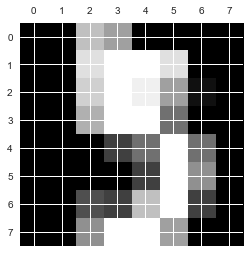

In [3]:
digits = load_digits()

#Plotando um dos valores
plt.gray()
plt.matshow(digits.images[5])
plt.show()

In [4]:
# Dividindo os dados entre treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

**Treinando o modelo**

In [5]:
Model1 = RandomForestClassifier(n_estimators=1000)  # Instanciando

Model1.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Aplicando o modelo treinado no conjunto de teste**

In [6]:
ypred = Model1.predict(Xtest)

**Verificando a acurácia**  
Nos dados abaixo podemos ver a acurácia de acerto para cada dígito predito pelo algoritmo treinado.

In [7]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      1.00      0.99        44
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.96      0.98      0.97        47
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



Podemos confrontar os valores preditos x reias através da confusion matrix

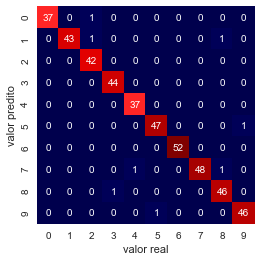

In [8]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap='seismic')
plt.xlabel('valor real')
plt.ylabel('valor predito');

## EXEMPLO2: Breast Cancer Dataset

**Trabalhando os dados**

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()

X_train1, X_test1, y_train1, y_test1 = train_test_split(cancer.data, cancer.target, random_state=0)

**Treinando e verificando a acurácia**

In [11]:
estimators = (2, 10, 100, 1000)

for i in estimators:
    cancerForest = RandomForestClassifier(n_estimators=i, random_state=0)
    cancerForest.fit(X_train1, y_train1);
    print('Teste com', i, 'arvores', cancerForest.score(X_test1, y_test1))

Teste com 2 arvores 0.8811188811188811
Teste com 10 arvores 0.951048951048951
Teste com 100 arvores 0.972027972027972
Teste com 1000 arvores 0.972027972027972


Como podemos ver acima, conforme o número de estimadores foi aumentando a acurácia foi ficando maior, porém não houve ganho quando passamos de 100 para 1000 de árvores. Devemos sempre verificar se há ganho quando incrementamos os estimadores, caso contrário podemos deixar o algoritmo lento desnecessariamente.

**Verificando a importância atribuída a cada uma das features**

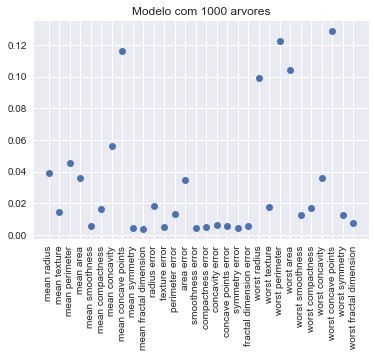

In [12]:
plt.plot(cancerForest.feature_importances_, 'o')
plt.title('Modelo com 1000 arvores')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);

Outro ponto que podemos observar é que devido à forma que a Random Forest é criada, o algoritmo acaba dando peso à outras features ingoradas quando trabalhamos somente com a decision tree.

## Exemplo3: Boston house-prices dataset

Para esse dataset vamos utilizar Random Forest de regressão para prever o preço das casas

**Trabalhando os Dados**

In [13]:
from sklearn.datasets import load_boston

In [14]:
boston = load_boston()

features = pd.DataFrame(boston.data)
target = pd.DataFrame(boston.target)

features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Como vamos trabalhar com um algoritmo regressor, é importante colocar os dados na mesma escala. Vamos utiizar o ``RobustScaler`` que traz dados robustos ainda que haja outliers.

In [15]:
# Importando
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [16]:
# Deixando na mesma escala tanto a features quanto o target
features = pd.DataFrame(scaler.fit_transform(features))
target = pd.DataFrame(scaler.fit_transform(target))

features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.070172,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.064285,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.064291,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062866,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052578,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

**Treinando o modelo**

In [18]:
regressor = RandomForestRegressor(n_estimators=500, random_state=0, )

In [19]:
regressor.fit(X_train, y_train.values.ravel());

**Verificando a acurácia**

In [20]:
regressor.score(X_train, y_train)

0.9833862386578042

In [21]:
regressor.score(X_test, y_test)

0.801675196005304

**Verificando a importência atribuída a cada uma das features**

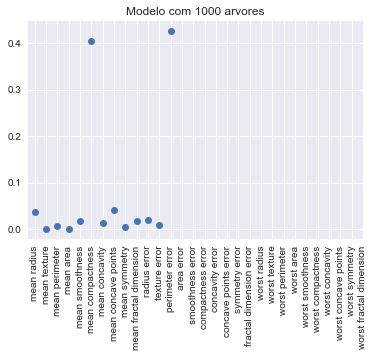

In [22]:
plt.plot(regressor.feature_importances_, 'o')
plt.title('Modelo com 1000 arvores')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90);